# Deep Learning for OR and FE
## Assignment 1
### Louis Francois (ljf2137) & Quentin Glangetas (qag200)

# Problem 3

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
from scipy.optimize import minimize
import time


# Disable eager execution of tensorflow

matplotlib.style.use("seaborn")

# Create data

## Limits

In [84]:
tmin, tmax = 1, 100

## Spirals

In [80]:
T = np.linspace(tmin, tmax, 101)
R1 = 60 + 0.2 * T
R2 = 40 + 0.4 * T
Phi1 = -0.06 * T + 3
Phi2 = -0.08 * T + 3

X1, Y1 = R1 * np.cos(Phi1), R1 * np.sin(Phi1)
X2, Y2 = R2 * np.cos(Phi2), R2 * np.sin(Phi2)

# Normalization
X1 /= 80
Y1 /= 80
X2 /= 80
Y2 /= 80

In [81]:
X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, Y2))

spirals_coordonates = np.stack((X,Y), axis=1)

## Labels

In [82]:
labels = [ -1 for _ in range(100) ] + [ 1 for _ in range(100) ] 
labels = np.array(labels)

# Visualization

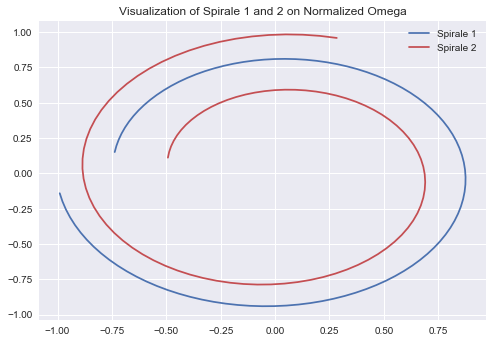

In [86]:
plt.plot( X1, Y1, label="Spirale 1", color="C0")
plt.plot( X2, Y2, label="Spirale 2", color="C2")
plt.title("Visualization of Spirale 1 and 2 on Normalized Omega")
plt.legend();

# Linear Clasification

Define some tools for visualization first.

In [87]:
def transformation(params, x, y):
    
    w11, w12, w13, w21, w22, w23, b1, b2, b3 = params
    
    xHat = np.tanh(w11*x + w21*y + b1)
    yHat = np.tanh(w12*x + w22*y + b2)
    zHat = np.tanh(w13*x + w23*y + b3)
    
    return xHat, yHat, zHat


def hyperplane(params, x, y):
    
    a, b, c, d = params
    
    return (-a*x-b*y-d)/c

## MAE Objective Function

Define first objective function.

In [134]:
def objective_mae(params, X, Y, X1, X2, Y1, Y2):
    
    a, b, c, d, w11, w12, w13, w21, w22, w23, b1, b2, b3 = params

    mae = 0
    
    xHat, yHat, zHat = transformation(params[4:], X, Y)
    
    xHat1, yHat1, zHat1 = transformation(params[4:], X1, Y1)
    xHat2, yHat2, zHat2 = transformation(params[4:], X2, Y2)
    
    # for y2 t = 1
    e = +1*(a*xHat2 + b*yHat2 + c*zHat2 + d)/np.sqrt(a**2+b**2+c**2)
    mae -= np.sum(e[e<0])
    
    # for y1 t = -1
    e = -1*(a*xHat1 + b*yHat1 + c*zHat1 + d)/np.sqrt(a**2+b**2+c**2)
    mae -= np.sum(e[e<0])
    
    return mae

## Hinge Objective Function

Define second objective function.

In [135]:
def objective_hinge(params, X, Y, X1, X2, Y1, Y2):
    
    a, b, c, d, w11, w12, w13, w21, w22, w23, b1, b2, b3 = params

    hinge_loss = 0
    
    xHat, yHat, zHat = transformation(params[4:], X, Y)
    
    xHat1, yHat1, zHat1 = transformation(params[4:], X1, Y1)
    xHat2, yHat2, zHat2 = transformation(params[4:], X2, Y2)
    
    # for y2 t = 1
    e = +1*(a*xHat2 + b*yHat2 + c*zHat2 + d)
    hinge_loss += np.sum( np.maximum(0, 1-e) )
    
    # for y1 t = -1
    e = -1*(a*xHat1 + b*yHat1 + c*zHat1 + d)
    hinge_loss += np.sum( np.maximum(0, 1-e) )
    
    return hinge_loss

## Initialization

Initial parameters. Visualization of the spirals in the initial transformed space.

In [136]:
# tanh hidden layer
tol = 1e-10

a  = -2
b = 1
c = 7
d = 3

w11 = 1
w12 = 2
w13 = -3
w21 = 10
w22 = -2
w23 = -2

b1  = 2
b2  = -1
b3  = 0

In [137]:
params =  np.array([a, b, c, d, w11, w12, w13, w21, w22, w23, b1, b2, b3])
args = (X, Y, X1, X2, Y1, Y2)
options = {'disp':True, 'maxiter':500}

In [153]:
def plot_problem3(params, plot_hyp=False):

    xHat, yHat, zHat = transformation(params[4:], X, Y)

    xHat1, yHat1, zHat1 = transformation(params[4:], X1, Y1)
    xHat2, yHat2, zHat2 = transformation(params[4:], X2, Y2)

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.plot3D(xHat1, yHat1, zHat1, c='C0', label='First spiral')
    ax.plot3D(xHat2, yHat2, zHat2, c='C2', label='Second spiral')
    ax.legend()
    
    if plot_hyp:
        X_, Y_ = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
        X_, Y_ = np.meshgrid(X_, Y_)
        Z_ = hyperplane(params[:4], X_, Y_)
        ax.plot_surface(X_, Y_, Z_,cmap=plt.cm.coolwarm)

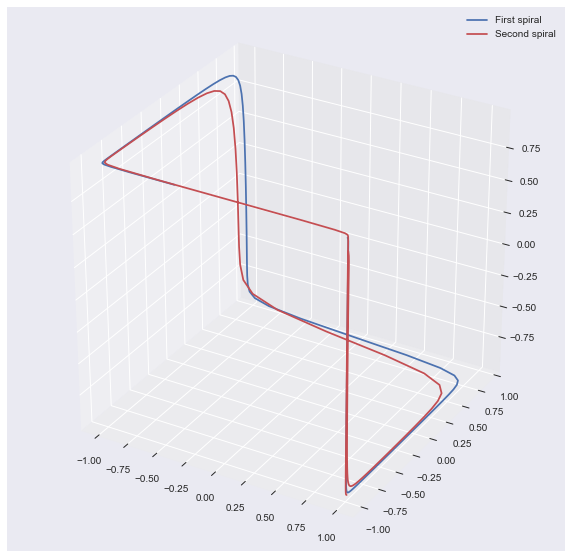

In [154]:
plot_problem3(params, plot_hyp=False)

## Optimization of MAE

Optimization with the MAE Objective Function as objective. Visualize results.

In [161]:
res_mae = minimize(objective_mae, params, args=args, tol=tol, options=options)

         Current function value: 0.000013
         Iterations: 37
         Function evaluations: 2143
         Gradient evaluations: 142


In [162]:
print(res.x)

[-9.99839524e-01 -2.73627553e-01  1.46281148e-04  2.73613351e-01
  2.91746461e+02 -3.37171618e+01 -2.13552436e+02 -5.98283163e+02
  1.80845520e+01 -6.52696494e+01  1.32485642e+02  5.15475816e+01
  4.51533701e+01]


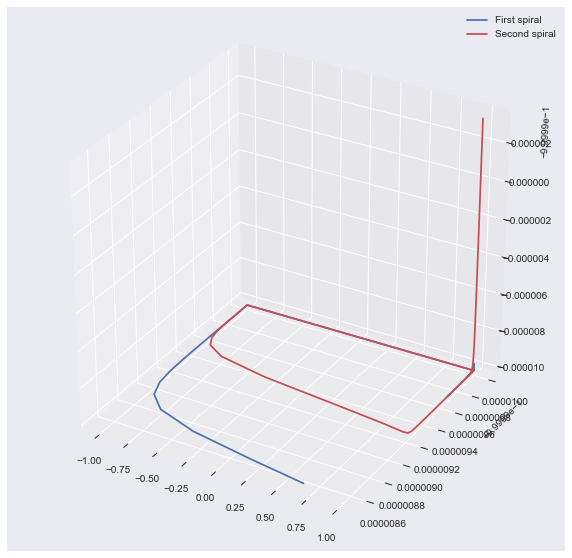

In [163]:
plot_problem3(res_mae.x, False)

## Optimization of Hinge

Optimization with the Hinge Objective Function as objective. Visualize results.

In [158]:
res_hinge = minimize(objective_hinge, params, args=args, tol=tol, options=options)

         Current function value: 90.399121
         Iterations: 36
         Function evaluations: 2060
         Gradient evaluations: 137


In [159]:
print(res_hinge.x)

[  7.59570681  -8.87946575  -3.25071596 -18.72282593 -70.95490376
  40.17619692 -12.30537206  67.11461121  20.88190152 -18.48031269
  74.51587191 -34.15599015 -19.59944351]


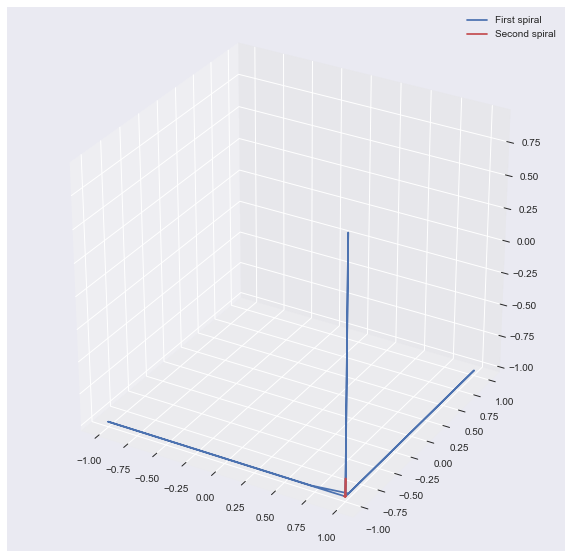

In [160]:
plot_problem3(res_hinge.x, False)